RAKAMIN FINAL PROJECT- DATA SCIENTIST (ID/X Partners)  
Alif Nurdien Fitrah Insani


# Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import dataset and create data frame
df = pd.read_csv('/content/drive/My Drive/Rakamin_Final_Project/loan_data_2007_2014.csv')
data = pd.DataFrame(df)

<ipython-input-3-7f17e45b8081>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Rakamin_Final_Project/loan_data_2007_2014.csv')


In [4]:
# show first 5 rows
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data analysis

In [5]:
# Ukuran dataframe
print('Jumlah baris: ',data.shape[0])
print('Jumlah kolom: ',data.shape[1])

Jumlah baris:  466285
Jumlah kolom:  75


In [6]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
#Persentase missing values pada masing" fitur
pd.set_option('display.max_rows', None)
missing_percentage = (data.isnull().sum() * 100 / data.shape[0]).sort_values(ascending=False)
missing_percentage = pd.DataFrame(missing_percentage)
print(missing_percentage)

                                      0
inq_last_12m                 100.000000
total_bal_il                 100.000000
dti_joint                    100.000000
verification_status_joint    100.000000
annual_inc_joint             100.000000
open_acc_6m                  100.000000
open_il_6m                   100.000000
open_il_12m                  100.000000
open_il_24m                  100.000000
mths_since_rcnt_il           100.000000
il_util                      100.000000
open_rv_24m                  100.000000
total_cu_tl                  100.000000
inq_fi                       100.000000
max_bal_bc                   100.000000
all_util                     100.000000
open_rv_12m                  100.000000
mths_since_last_record        86.566585
mths_since_last_major_derog   78.773926
desc                          72.981975
mths_since_last_delinq        53.690554
next_pymnt_d                  48.728567
tot_cur_bal                   15.071469
tot_coll_amt                  15.071469


In [8]:
missing_percentage.rename(columns={'0': 'Percentage'}, inplace=True)
missing_percentage.reset_index(inplace=True)
missing_percentage.rename(columns={'index': 'Variable'}, inplace=True)

In [9]:
missing_percentage

,Variable,0
0,inq_last_12m,100.000000
1,total_bal_il,100.000000
2,dti_joint,100.000000
3,verification_status_joint,100.000000
4,annual_inc_joint,100.000000
5,open_acc_6m,100.000000
6,open_il_6m,100.000000
7,open_il_12m,100.000000
8,open_il_24m,100.000000
9,mths_since_rcnt_il,100.000000


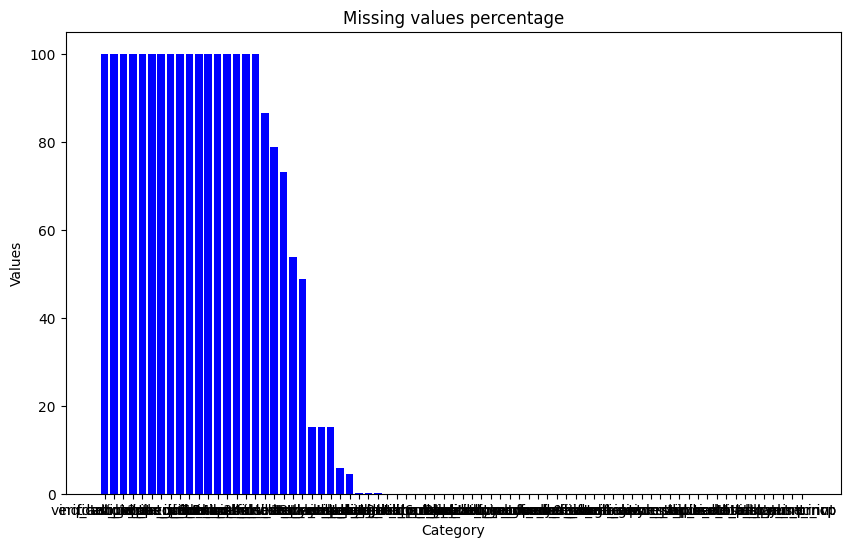

In [10]:
df = pd.DataFrame(data)

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage['Variable'], missing_percentage[0], color='blue')

# Adding title and labels
plt.title('Missing values percentage')
plt.xlabel('Category')
plt.ylabel('Values')

# Show the plot
plt.show()

In [11]:
data.drop(['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1,inplace=True)

In [12]:
#Persentase missing values pada masing" fitur

missing_percentage = (data.isnull().sum() * 100 / data.shape[0]).sort_values(ascending=False)
print(missing_percentage)

mths_since_last_record         86.566585
mths_since_last_major_derog    78.773926
desc                           72.981975
mths_since_last_delinq         53.690554
next_pymnt_d                   48.728567
tot_cur_bal                    15.071469
tot_coll_amt                   15.071469
total_rev_hi_lim               15.071469
emp_title                       5.916553
emp_length                      4.505399
last_pymnt_d                    0.080637
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
last_credit_pull_d              0.009007
pub_rec                         0.006219
inq_last_6mths                  0.006219
delinq_2yrs                     0.006219
open_acc                        0.006219
earliest_cr_line                0.006219
acc_now_delinq                  0.006219
total_acc                       0.006219
title                           0.004504
annual_inc                      0.000858
total_rec_int                   0.000000
total_rec_late_f

In [13]:
# Banyaknya nilai unik per fitur
data.nunique().sort_values()

policy_code                         1
application_type                    1
pymnt_plan                          2
term                                2
initial_list_status                 2
verification_status                 3
home_ownership                      6
acc_now_delinq                      6
grade                               7
collections_12_mths_ex_med          9
loan_status                         9
emp_length                         11
purpose                            14
delinq_2yrs                        24
pub_rec                            26
inq_last_6mths                     28
sub_grade                          35
addr_state                         50
open_acc                           62
issue_d                            91
last_pymnt_d                       98
next_pymnt_d                      100
last_credit_pull_d                103
total_acc                         112
mths_since_last_record            123
mths_since_last_delinq            145
mths_since_l

fitur **policy_code** dan **application_type** hanya memiliki satu nilai unik. Jadi kolom ini dapat dihapus karena tidak berguna dalam pembuatan model nantinya.

In [14]:
#drop kolom "policy_code" dan "application_typr"
data.drop(labels=['policy_code', 'application_type'], axis=1, inplace=True)

In [15]:
data.drop(labels=['pub_rec','emp_length','title','purpose','desc','sub_grade','grade','next_pymnt_d','Unnamed: 0','id','member_id','url','zip_code','addr_state','initial_list_status','verification_status','addr_state', 'pymnt_plan','emp_title'], axis=1, inplace=True)

<Axes: >

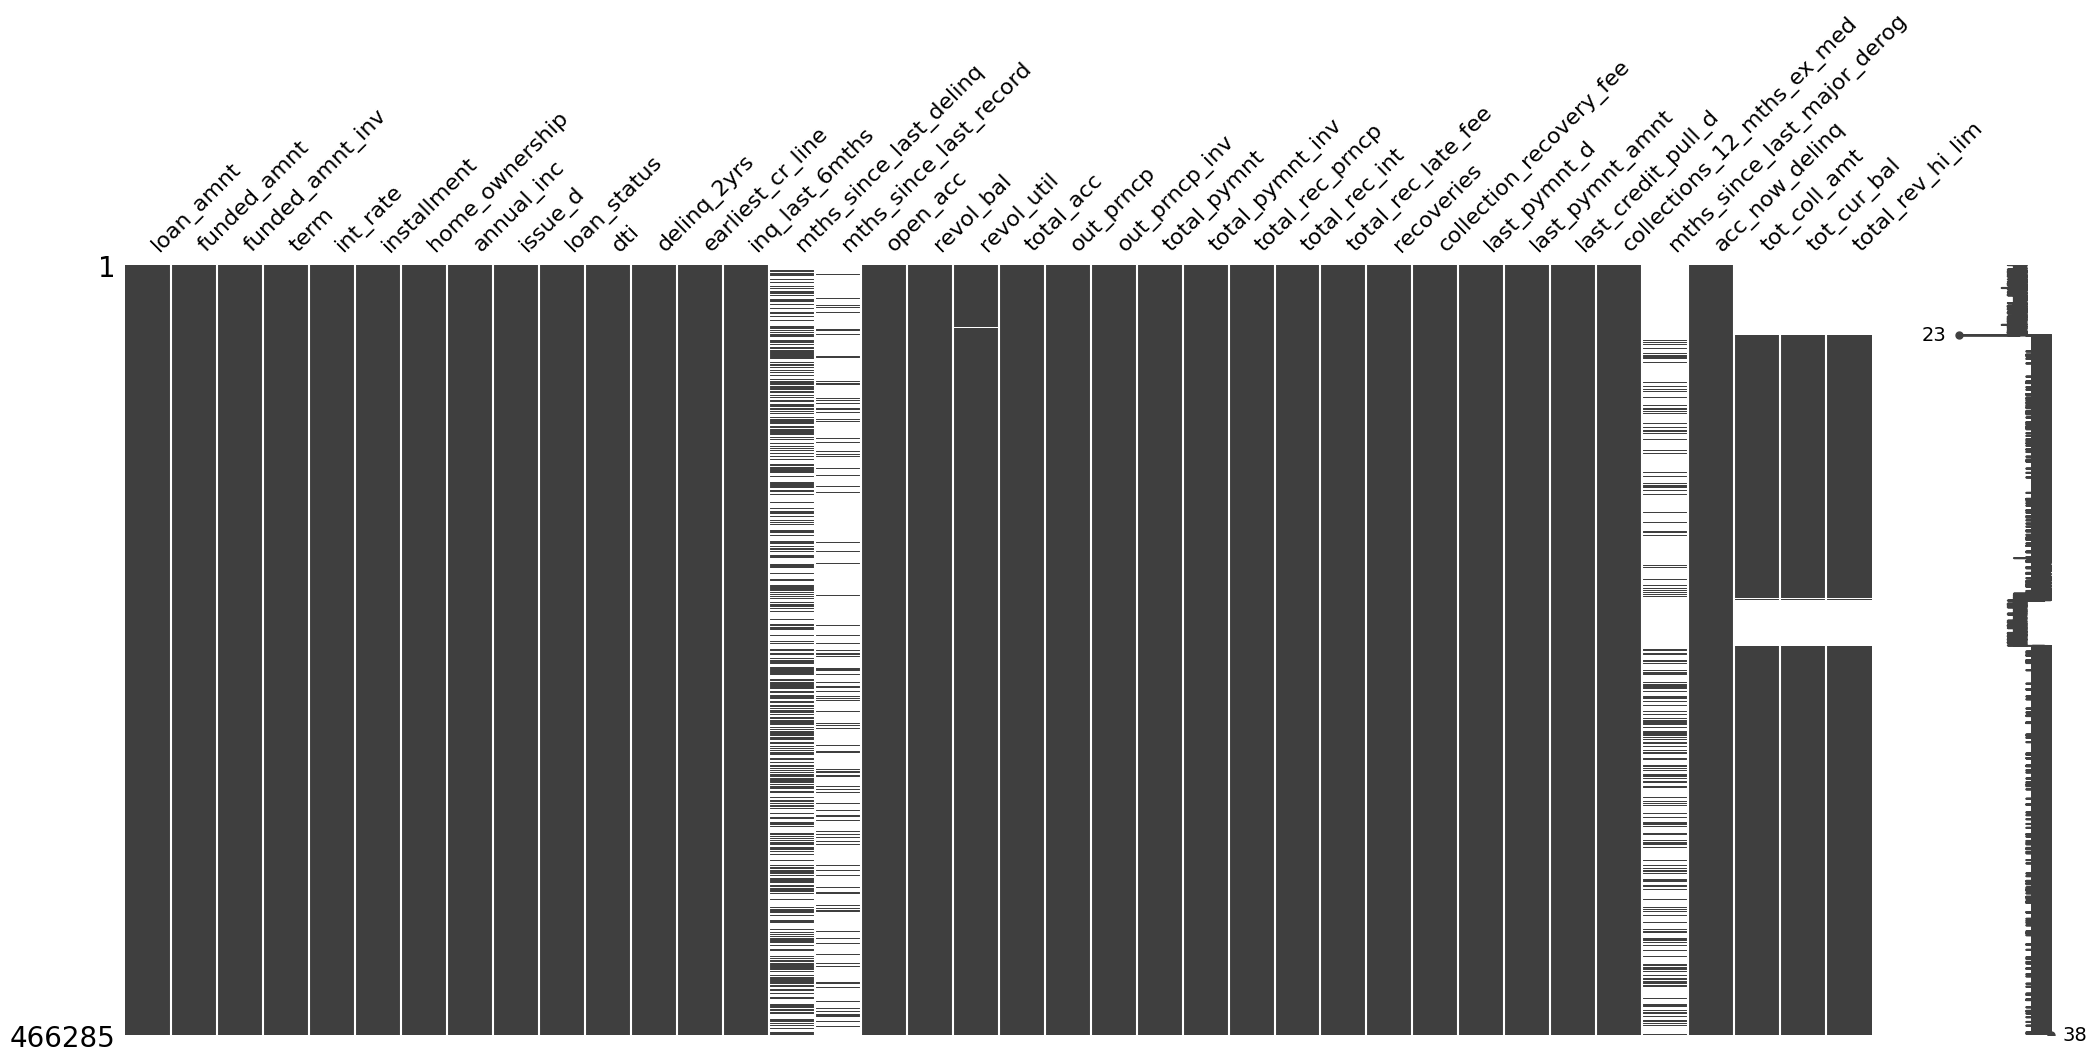

In [16]:
msno.matrix(data)

# Identifikasi variabel target

In [17]:
# explore the unique values in loan_status column
data['loan_status'].value_counts(normalize = True)

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: proportion, dtype: float64

In [18]:
# create a new column based on the loan_status column that will be our target variable
data['good_bad'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns = ['loan_status'], inplace = True)

# Pemisahan data

In [19]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X = data.drop('good_bad', axis = 1)
y = data['good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train, X_test = X_train.copy(), X_test.copy()

# data Transformasi


Kolom date

In [20]:
# convert date columns to datetime format and create a new column as a difference between today and the respective date
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

# let's check these new columns
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())

count    373003.000000
mean        269.331056
std          84.805903
min         103.000000
25%         211.000000
50%         252.000000
75%         311.000000
max         608.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    373028.000000
mean         81.844250
std          13.938665
min          67.000000
25%          72.000000
50%          78.000000
75%          87.000000
max         155.000000
Name: mths_since_issue_d, dtype: float64
count    372717.000000
mean         62.203594
std          12.578076
min          54.000000
25%          54.000000
50%          55.000000
75%          66.000000
max         149.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    372998.000000
mean         58.002796
std           9.477184
min          54.000000
25%          54.000000
50%          54.000000
75%          56.000000
max         156.000000
Name: mths_since_last_credit_pull_d, dtype: float64


kolom term

In [21]:
# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

loan_term_converter(X_train, 'term')

# Feature selection

In [22]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

Anova Statistik

In [23]:
from sklearn.feature_selection import f_classif

In [24]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,recoveries,90537.035684,0.000000e+00
1,collection_recovery_fee,36791.724904,0.000000e+00
2,total_rec_prncp,25802.128759,0.000000e+00
3,mths_since_last_pymnt_d,23821.725199,0.000000e+00
4,total_pymnt_inv,14784.534040,0.000000e+00
5,total_pymnt,14686.729567,0.000000e+00
6,int_rate,11462.788313,0.000000e+00
7,last_pymnt_amnt,10826.949727,0.000000e+00
8,out_prncp,9635.116160,0.000000e+00
9,out_prncp_inv,9633.442129,0.000000e+00


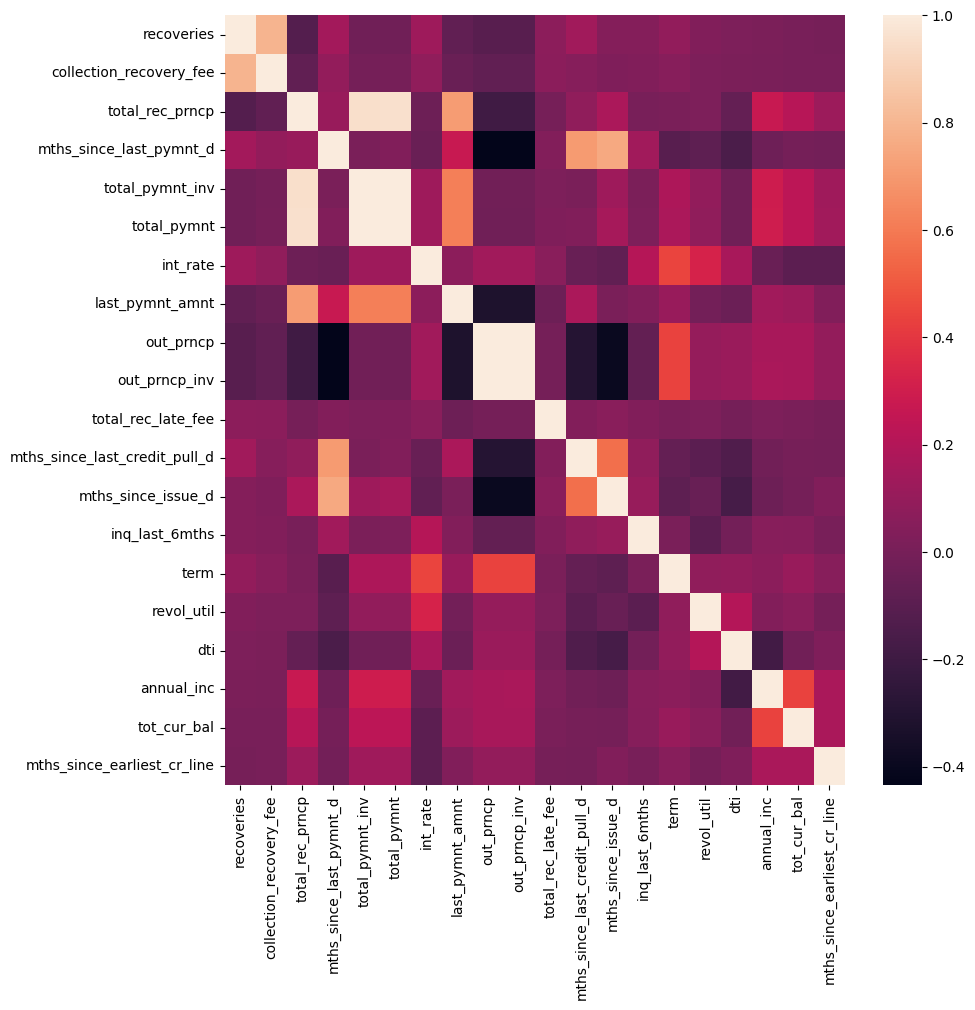

In [25]:
# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:20,0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

# Machine learning modelling

In [26]:
from lightgbm import LGBMClassifier

In [27]:
# feature matrix
X = X_train_num

# target vector
y = X_train_cat

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [28]:
# standardize numerical variables
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


In [29]:
from sklearn.pipeline import make_pipeline
# define the function val_model
def val_model(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.

    # Returns
        float, mean value of the cross-validation scores.
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if show == True:
        print(f'Recall: {scores.mean()}, {scores.std()}')

    return scores.mean()

In [30]:
#evaluate the models
lgb = LGBMClassifier()

model_names = [lgb]
model = []
recall = []

for clf in model_names:
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train, y_train, clf, show=False))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6646
[LightGBM] [Info] Number of data points in the train set: 223816, number of used features: 36
[LightGBM] [Info] Start training from score -0.681288
[LightGBM] [Info] Start training from score -9.099704
[LightGBM] [Info] Start training from score -7.764703
[LightGBM] [Info] Start training from score -2.415692
[LightGBM] [Info] Start training from score -0.905861


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklea

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6623
[LightGBM] [Info] Number of data points in the train set: 223817, number of used features: 36
[LightGBM] [Info] Start training from score -0.681293
[LightGBM] [Info] Start training from score -9.140530
[LightGBM] [Info] Start training from score -7.754236
[LightGBM] [Info] Start training from score -2.415697
[LightGBM] [Info] Start training from score -0.905855


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklea

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6626
[LightGBM] [Info] Number of data points in the train set: 223817, number of used features: 36
[LightGBM] [Info] Start training from score -0.681293
[LightGBM] [Info] Start training from score -9.099708
[LightGBM] [Info] Start training from score -7.764707
[LightGBM] [Info] Start training from score -2.415697
[LightGBM] [Info] Start training from score -0.905855


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklea

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6688
[LightGBM] [Info] Number of data points in the train set: 223817, number of used features: 36
[LightGBM] [Info] Start training from score -0.681293
[LightGBM] [Info] Start training from score -9.099708
[LightGBM] [Info] Start training from score -7.764707
[LightGBM] [Info] Start training from score -2.415697
[LightGBM] [Info] Start training from score -0.905855


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklea

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6629
[LightGBM] [Info] Number of data points in the train set: 223817, number of used features: 36
[LightGBM] [Info] Start training from score -0.681284
[LightGBM] [Info] Start training from score -9.099708
[LightGBM] [Info] Start training from score -7.764707
[LightGBM] [Info] Start training from score -2.415697
[LightGBM] [Info] Start training from score -0.905866


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklea

,Recall
LGBMClassifier,NaN


In [ ]:
from sklearn.model_selection import StratifiedKFold
# LightGBM
lbg = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')